In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample
import pywt

In [2]:
def wavelet_denoise(ecg_signal, wavelet="db4", level=3):
    """
    Apply wavelet denoising to a 12-lead ECG signal.

    Parameters:
    - ecg_signal: numpy array of shape (12, 500)
    - wavelet: the type of wavelet to use (default is 'db4')
    - level: level of decomposition (default is 3)

    Returns:
    - denoised_ecg: numpy array of the denoised ECG signal with the same shape as the input
    """
    denoised_ecg = np.zeros_like(ecg_signal)
    for i in range(ecg_signal.shape[0]):
        coeffs = pywt.wavedec(ecg_signal[i], wavelet, level=level)
        sigma = np.median(np.abs(coeffs[-1])) / 0.6745
        threshold = sigma * np.sqrt(2 * np.log(len(ecg_signal[i])))
        denoised_coeffs = [pywt.threshold(c, threshold, mode="soft") for c in coeffs]
        denoised_ecg[i] = pywt.waverec(denoised_coeffs, wavelet)

    return denoised_ecg

In [3]:
PERIOD = 400

In [4]:
original = pd.read_csv("beijing_temperature.csv", header=None).to_numpy()
baseline = np.mean(original, axis=1)

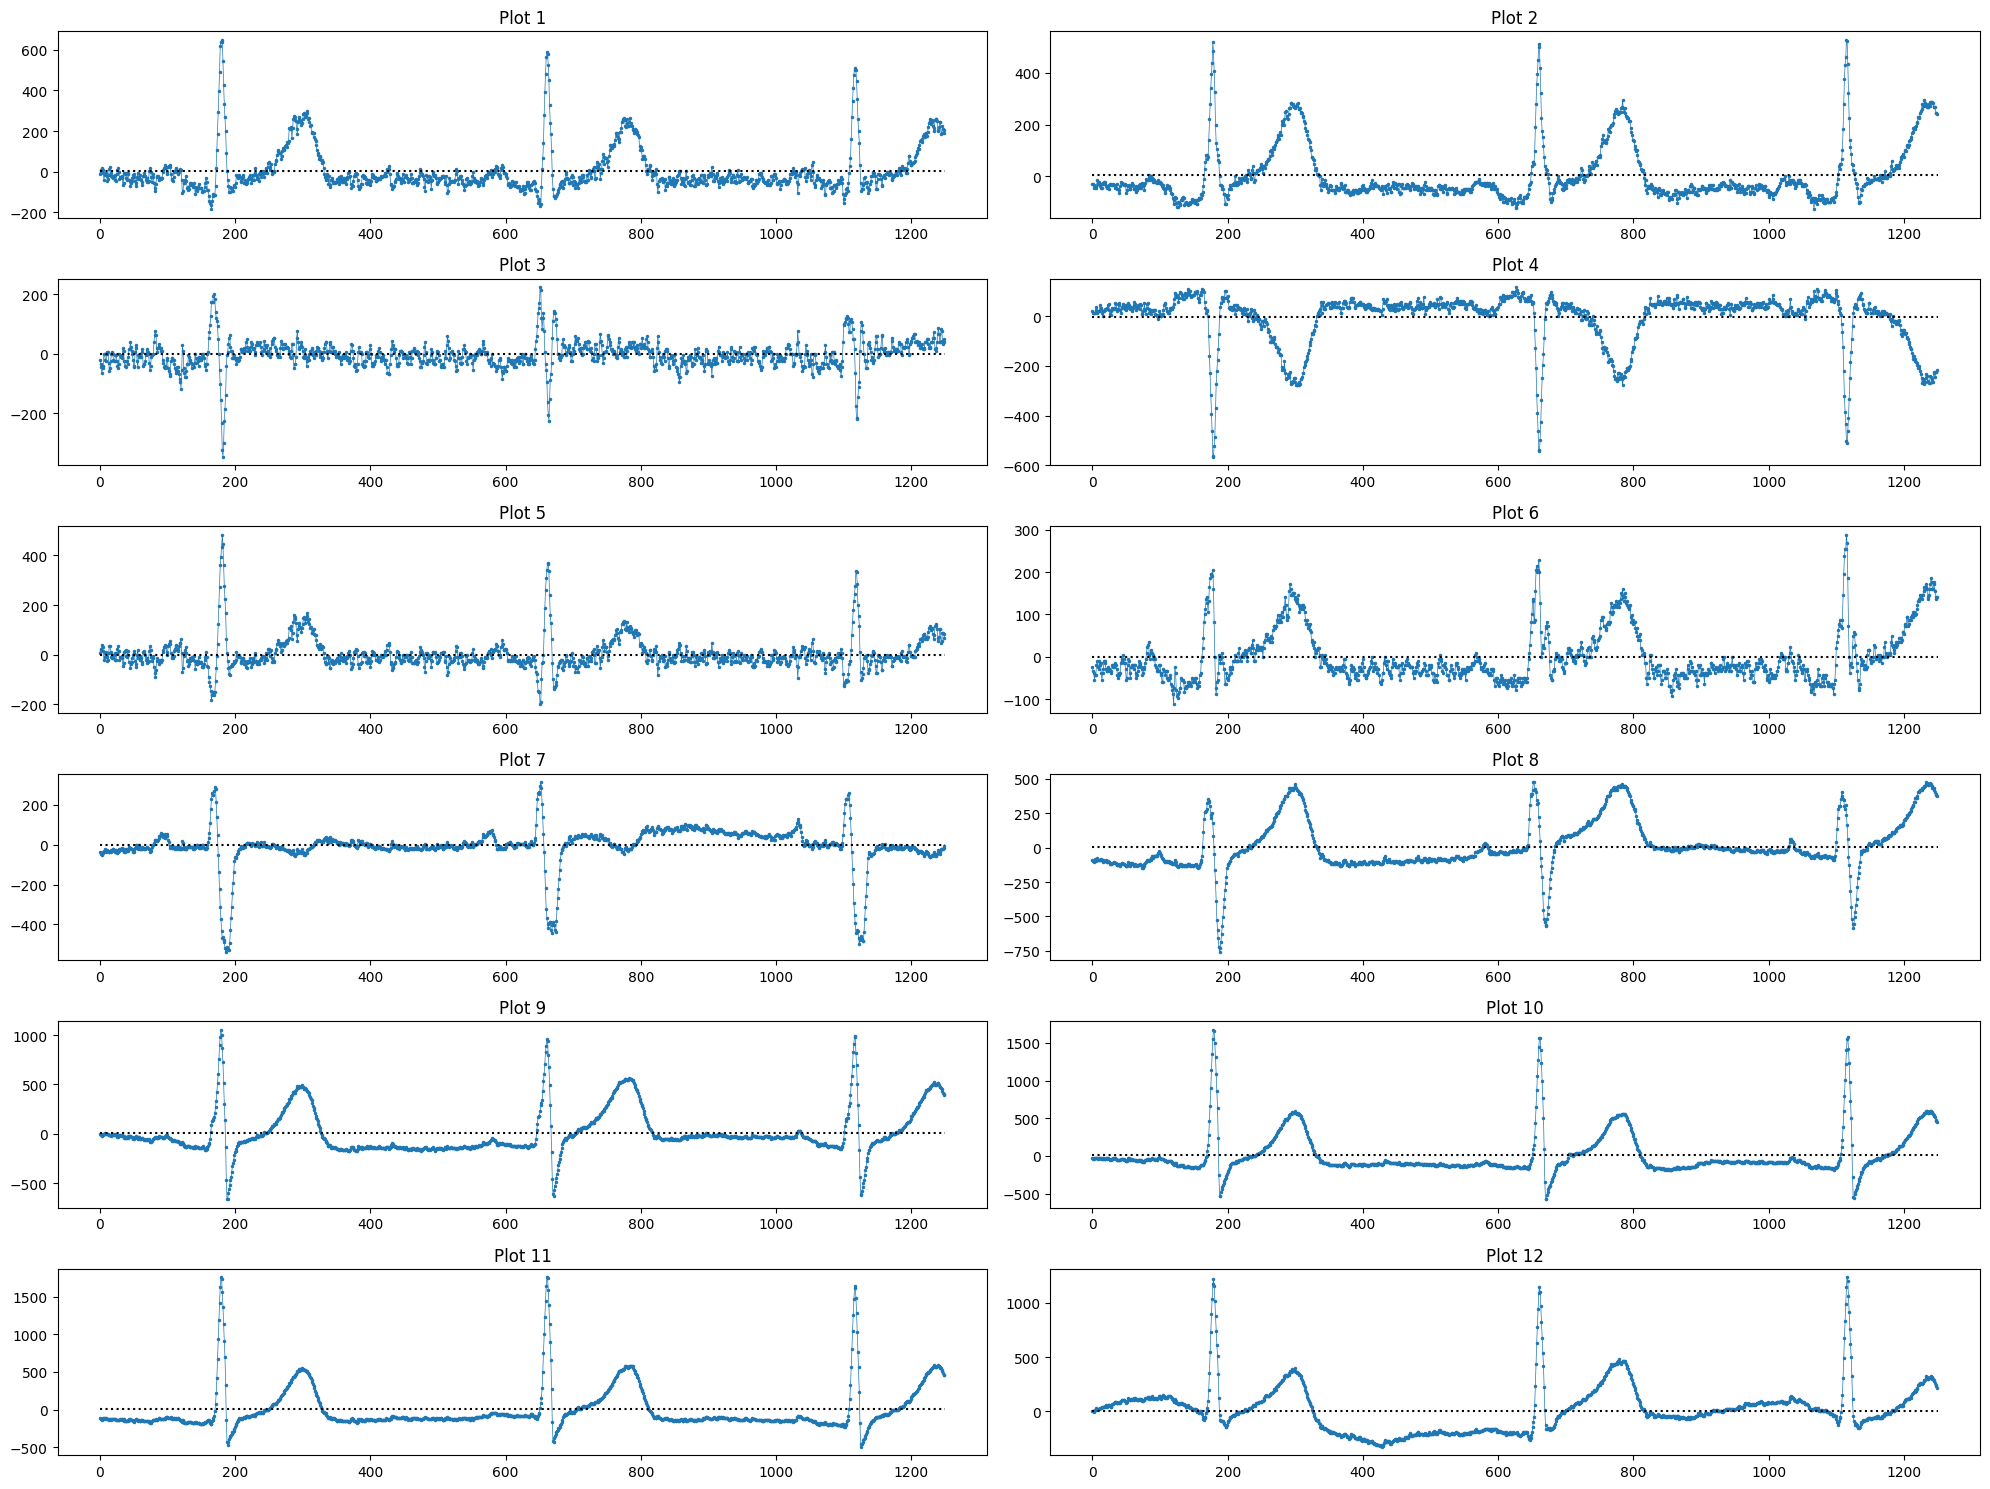

In [8]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(original[i][:1250], '.-', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, 1250, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

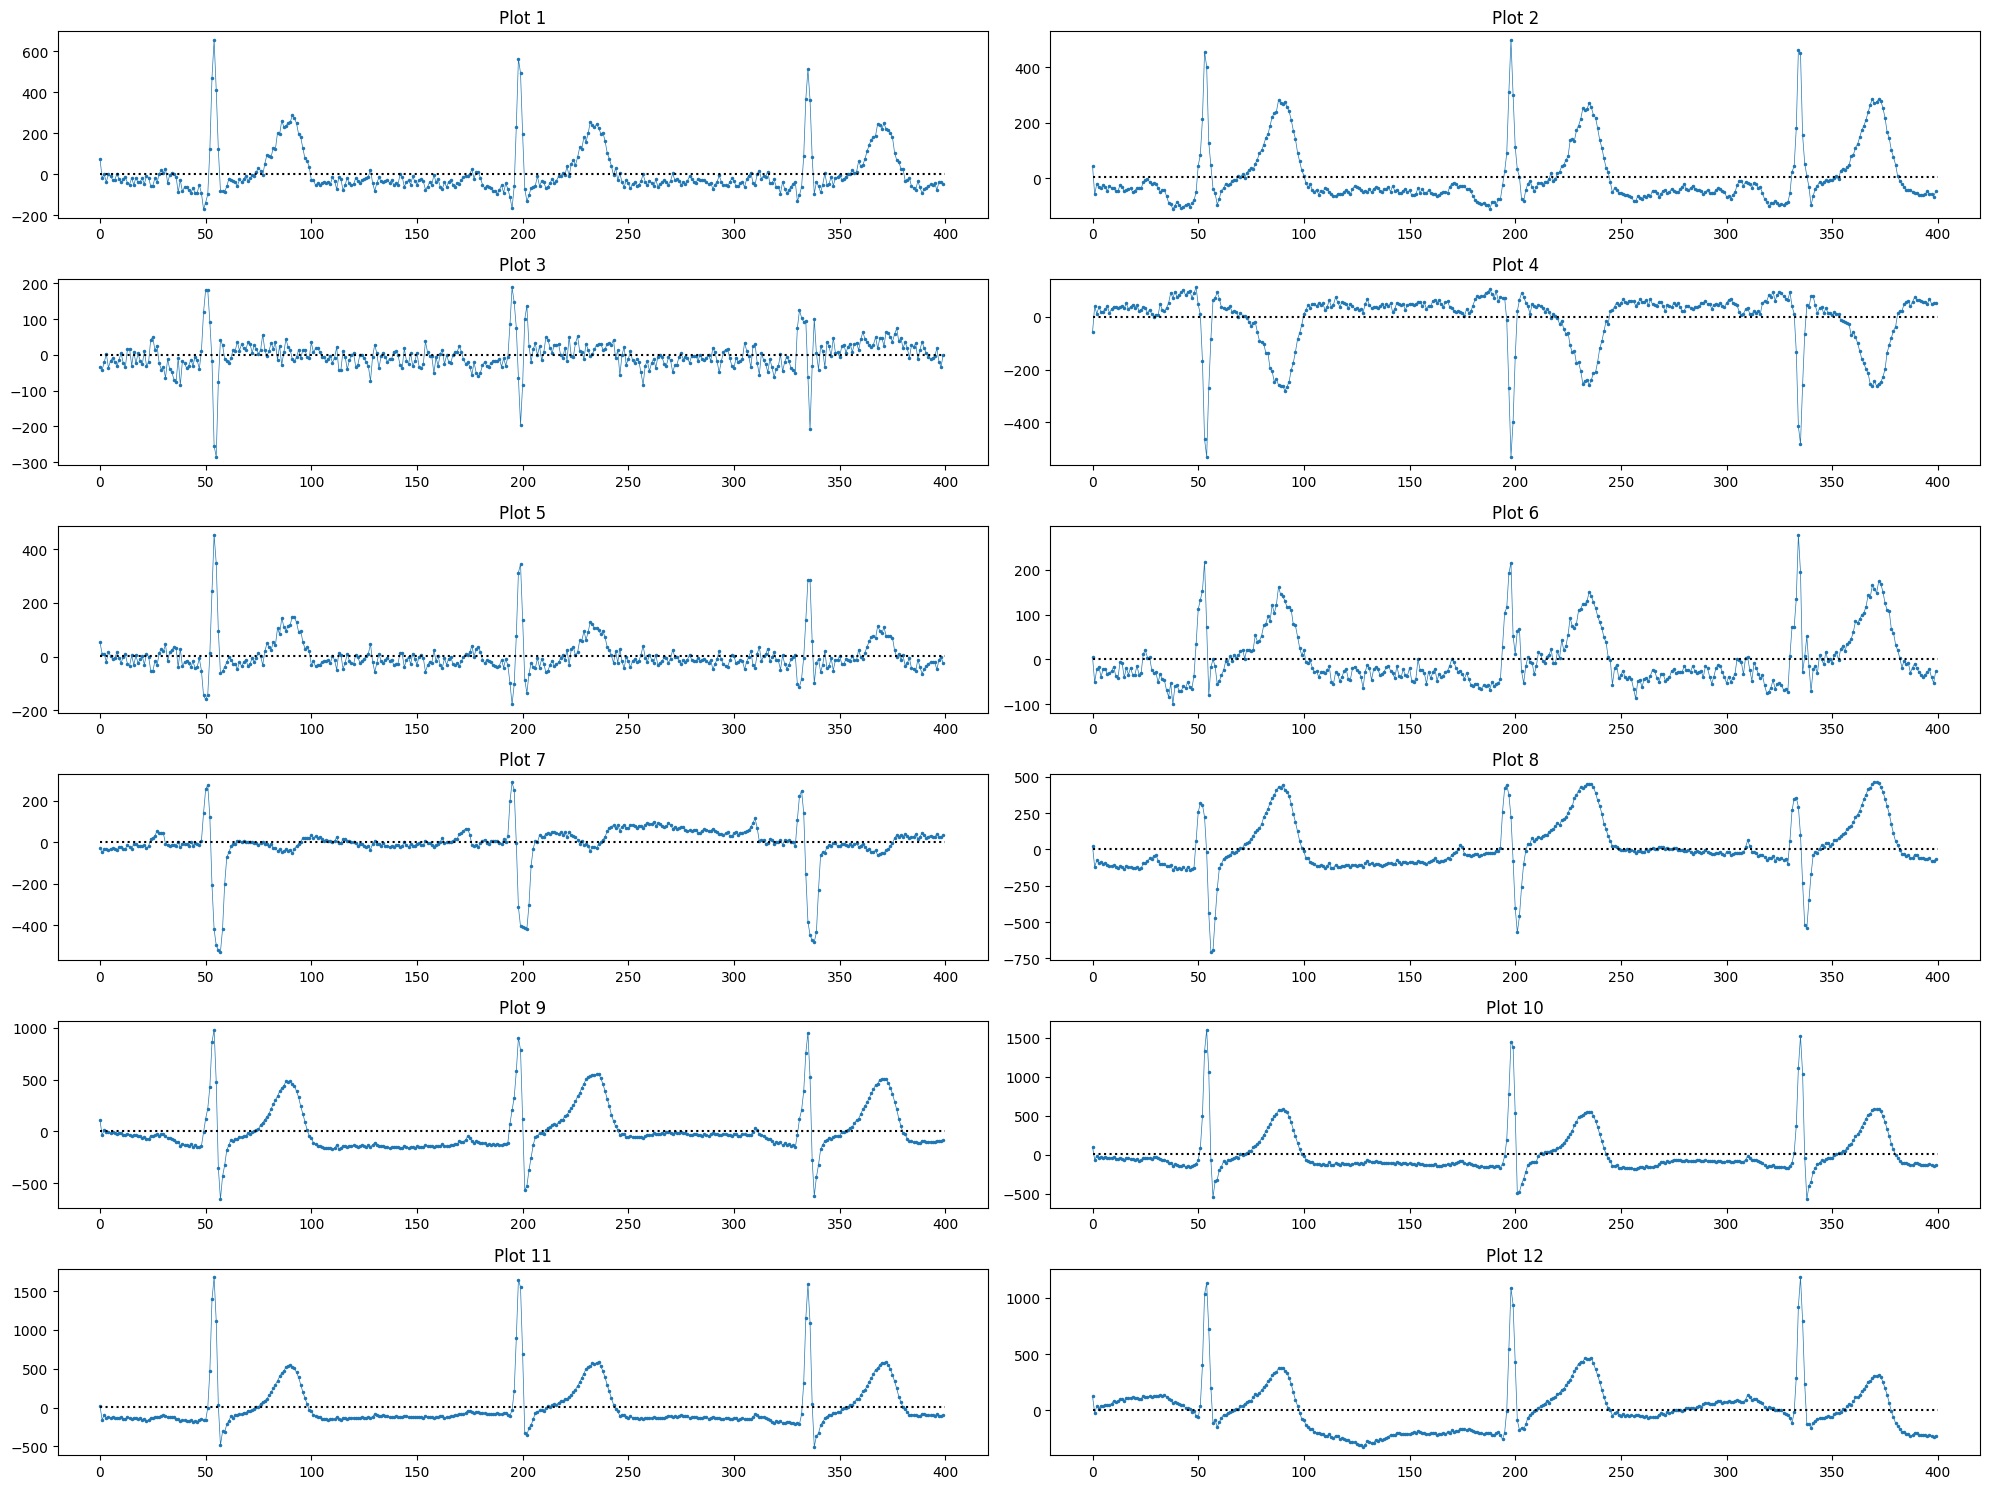

In [9]:
original = resample(original, 1500, axis=1)
original = np.round(original).astype(int)
baseline = np.mean(original, axis=1)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(original[i][:PERIOD], '.-', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, PERIOD, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

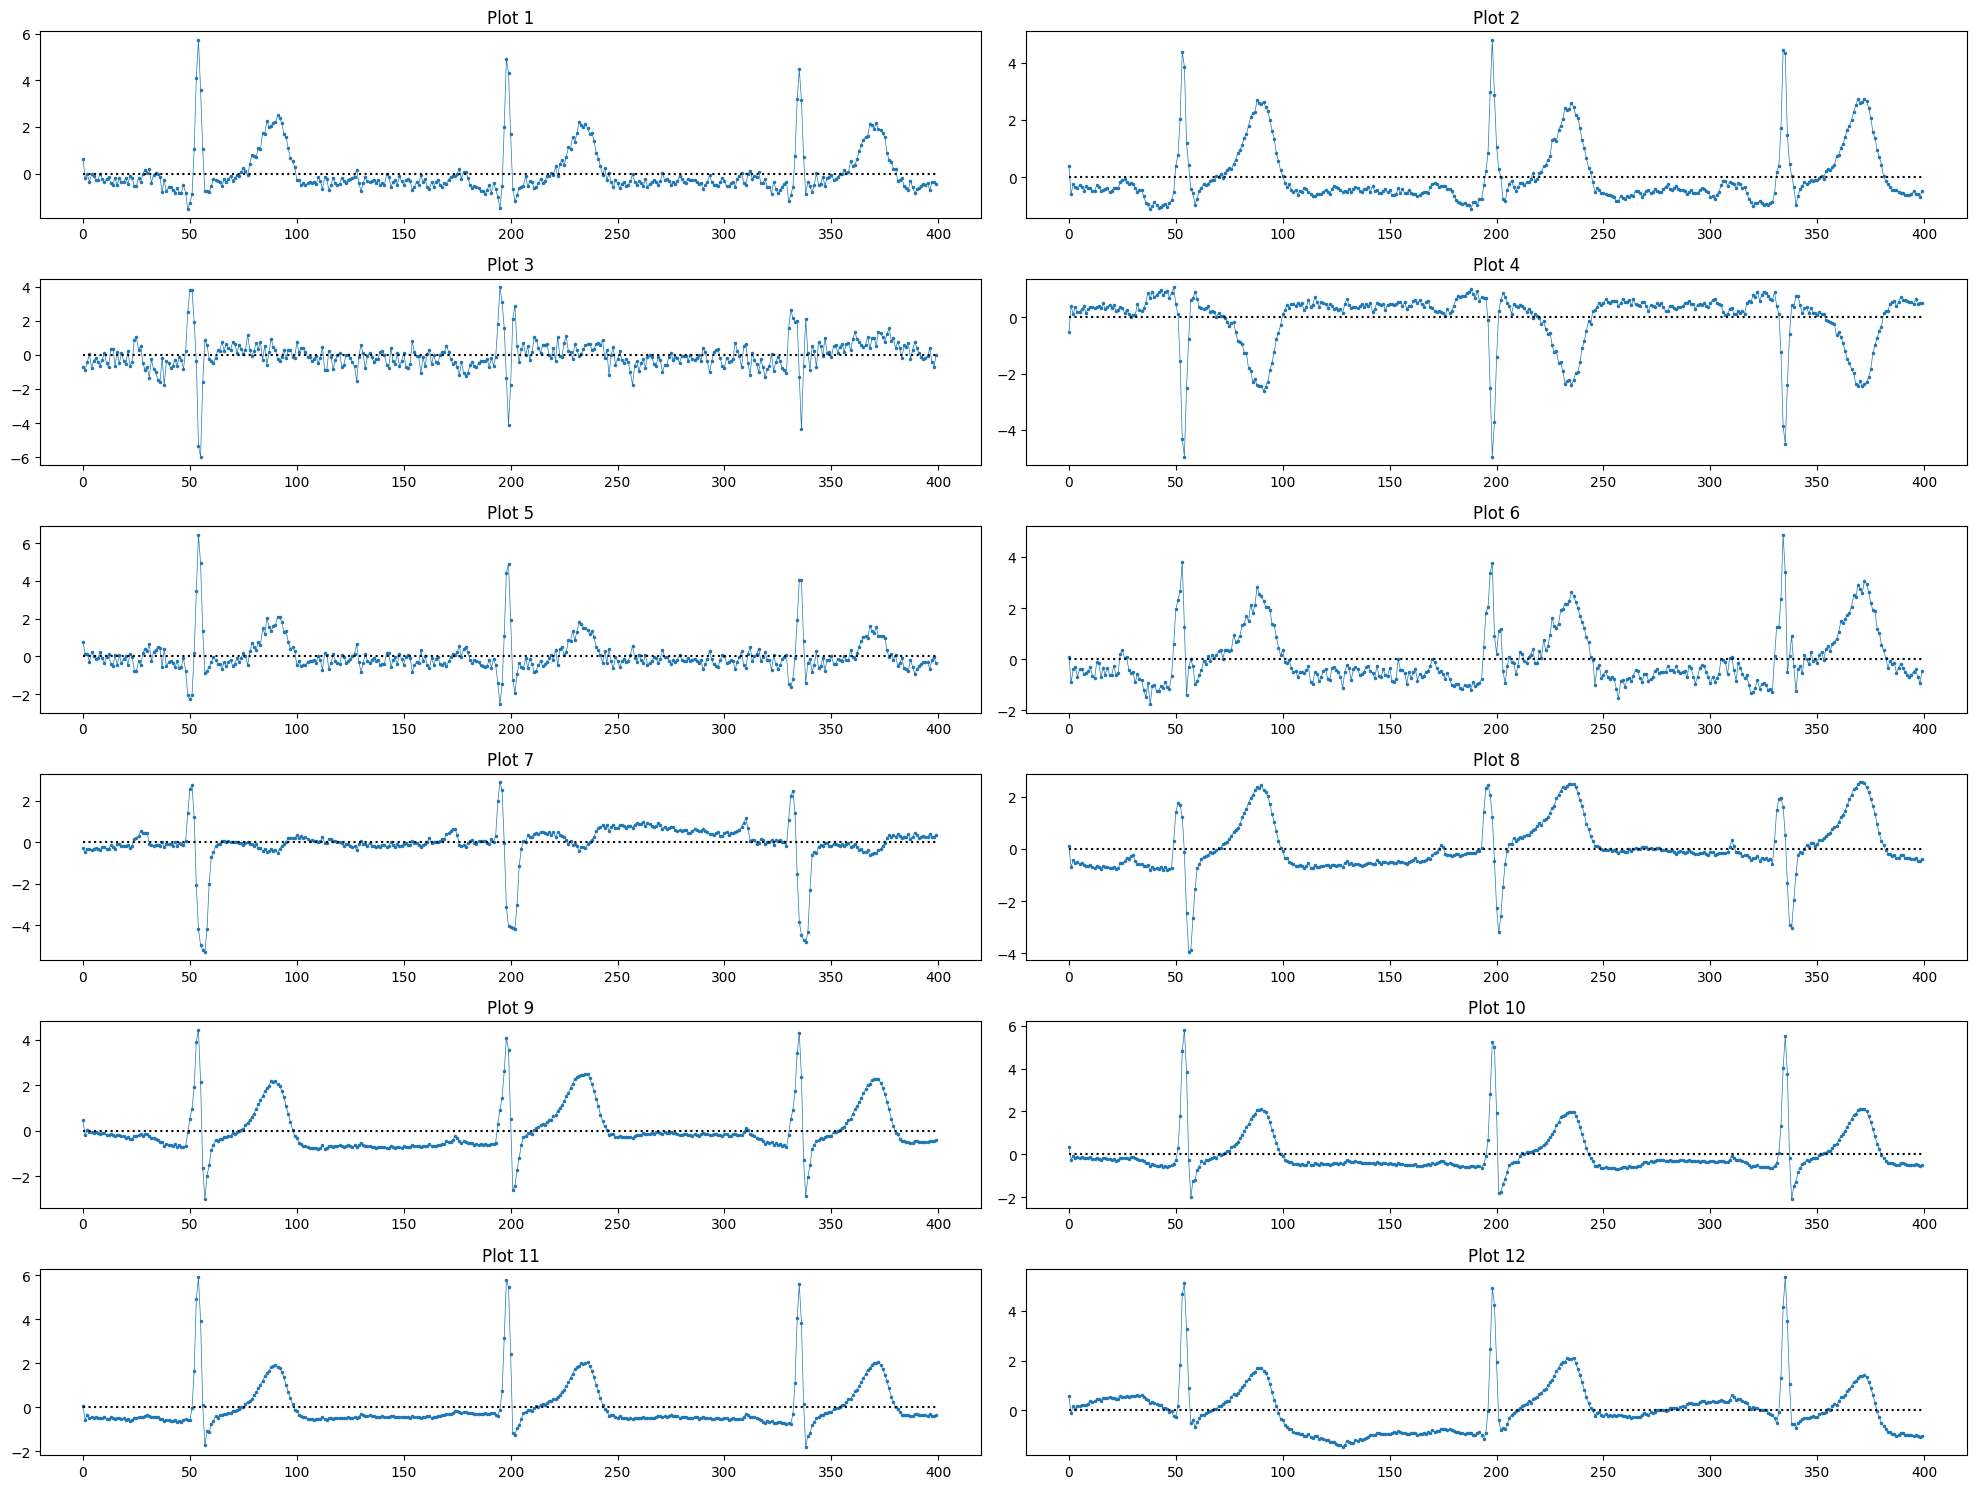

In [10]:
original = ((original.T - original.T.mean(axis=0)) / (original.T.std(axis=0))).T
baseline = np.mean(original, axis=1)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(original[i][:PERIOD], '.-', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, PERIOD, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

In [11]:
Y = pd.read_csv("beijing_temperature.csv", header=None).to_numpy()
Y

array([[ -10,    5,   10, ...,  156,  181,  176],
       [ -29,  -29,  -34, ...,  146,  166,  171],
       [ -20,  -34,  -44, ...,  -10,  -15,   -5],
       ...,
       [ -34,  -39,  -34, ...,  342,  356,  361],
       [-112, -122, -127, ...,  273,  288,  298],
       [   5,    0,   -5, ...,  351,  366,  371]])

In [12]:
Y = resample(Y, 1500, axis=1)
Y = np.round(Y).astype(int)
Y = Y[:, :PERIOD]
Y = wavelet_denoise(Y, wavelet="db4", level=None)
Y = ((Y.T - Y.T.mean(axis=0)) / (Y.T.std(axis=0))).T
baseline = np.mean(Y, axis=1)
Y.shape

(12, 400)

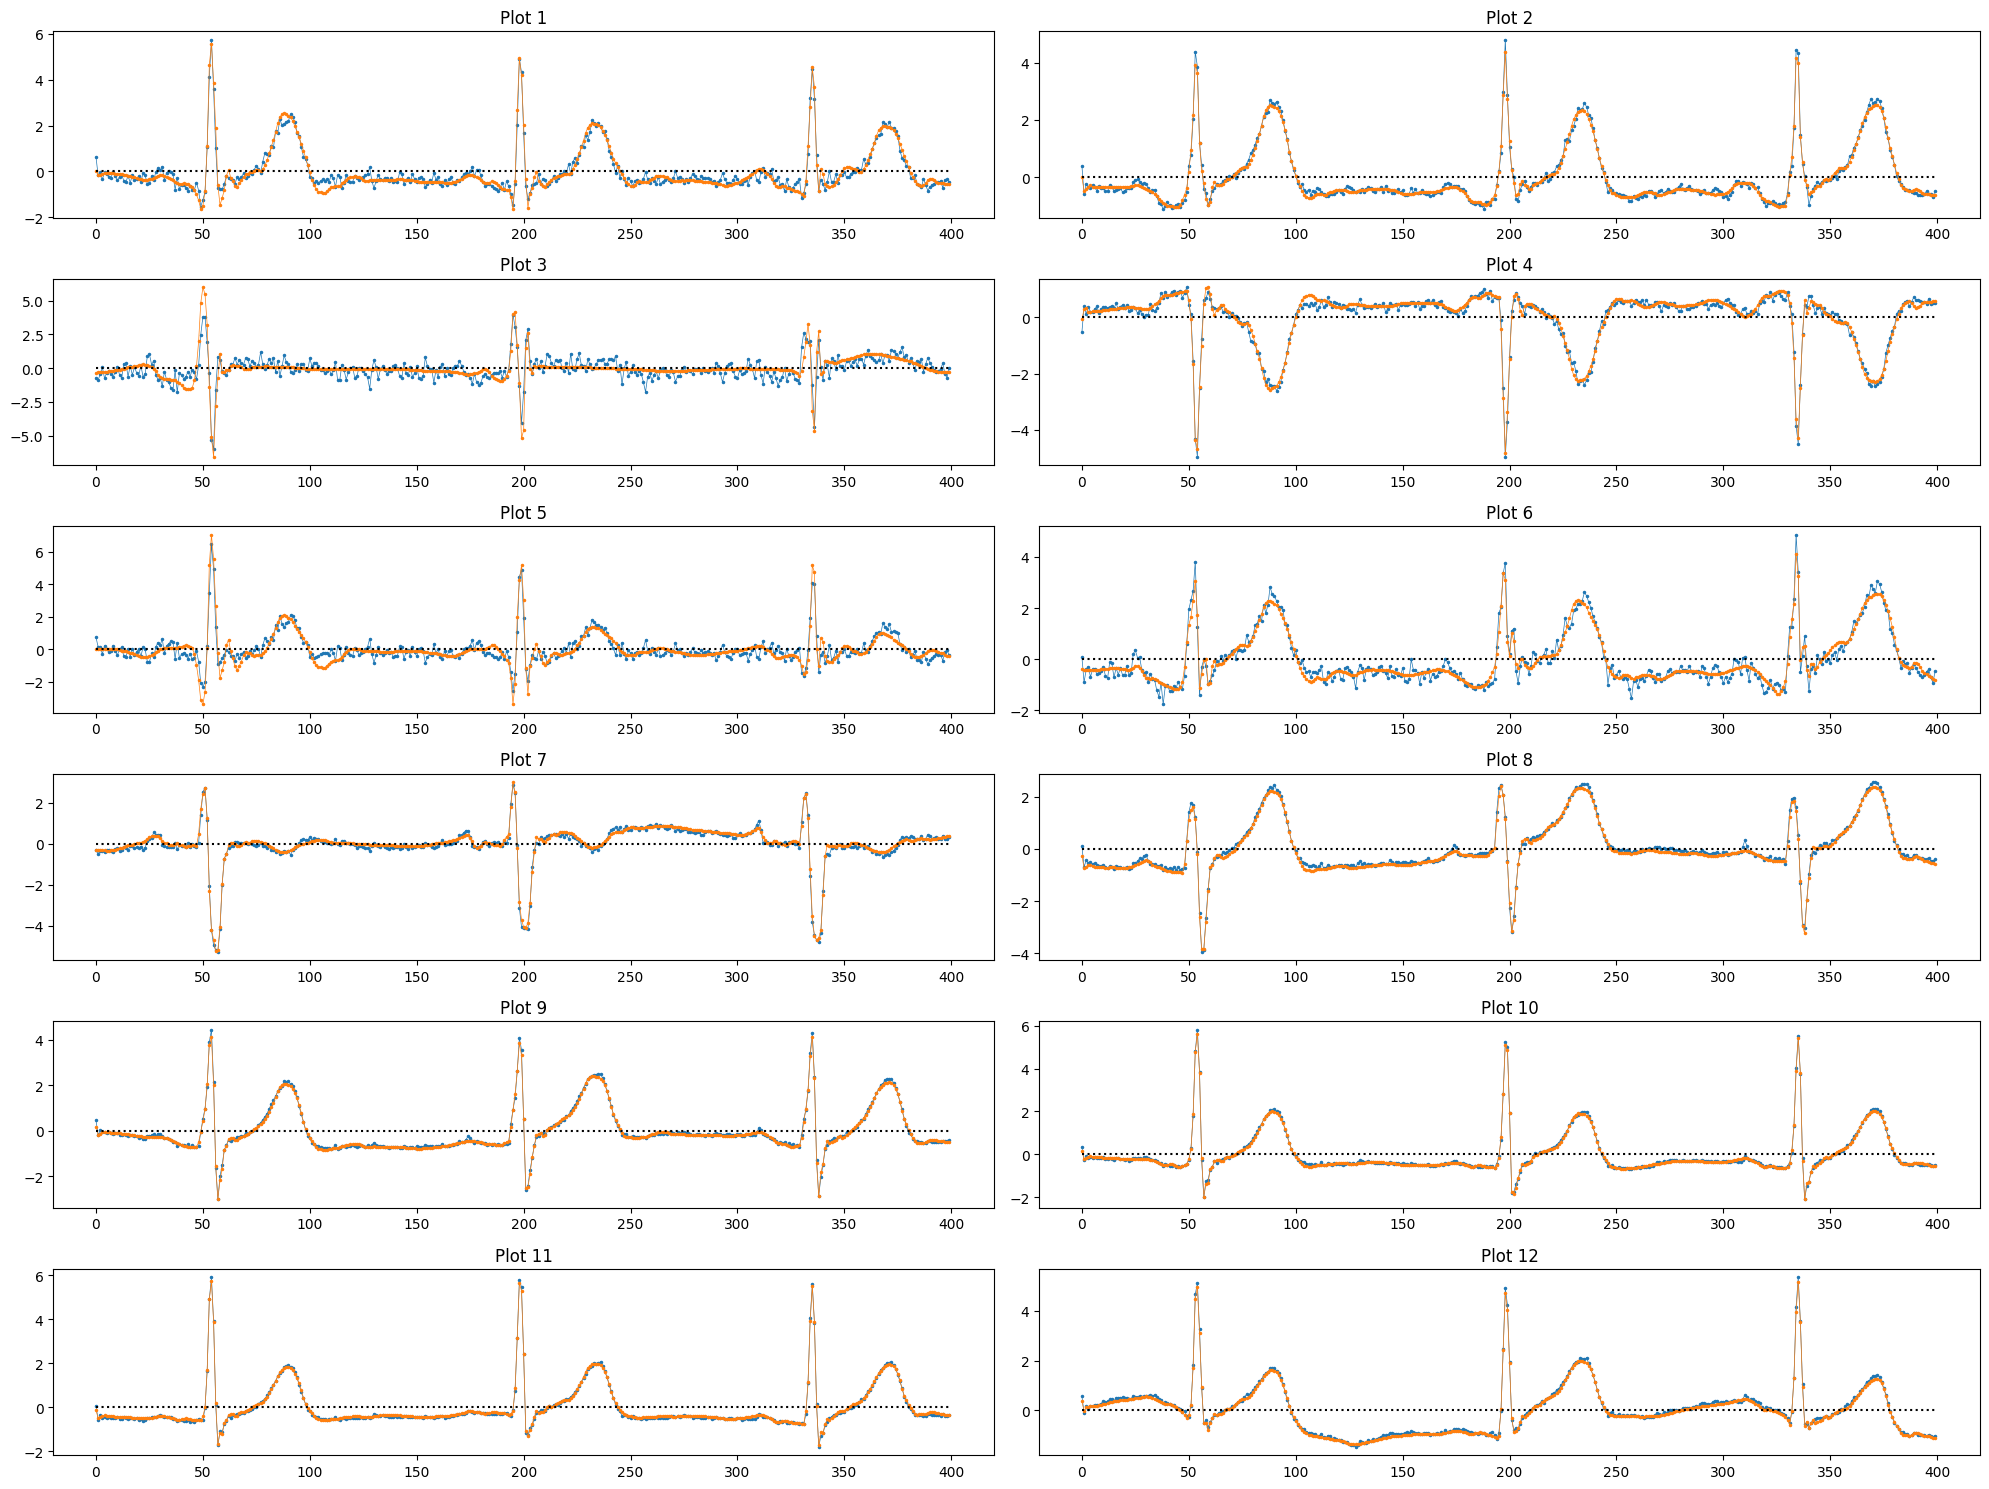

In [13]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(original[i][:PERIOD], '.-', linewidth=0.5, markersize=3)
    axes[i].plot(Y[i][:PERIOD], '.-', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, PERIOD, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

In [14]:
rec = pd.read_csv("/Users/ljoana/repos/rPSMF/400s_r3_n3_60it_wavelet_stand_20test.csv", header=None).to_numpy()
rec2 = pd.read_csv("/Users/ljoana/repos/rPSMF/400s_r3_n3_150it_wavelet_stand_20test.csv", header=None).to_numpy()
rec3 = pd.read_csv("/Users/ljoana/repos/rPSMF/400s_r3_n3_60it_wavelet_stand_20test.csv", header=None).to_numpy()
rec

array([[-0.10576295, -0.19141608, -0.30499315, ...,  0.0613965 ,
         0.31049851,  0.46165418],
       [-0.18820467, -0.28726574, -0.42521099, ...,  0.04059169,
         0.32638273,  0.50812303],
       [-0.01469022, -0.04441964, -0.07490449, ...,  0.00554369,
         0.04152495,  0.0637362 ],
       ...,
       [-0.14609006, -0.23074489, -0.34478813, ...,  0.05868061,
         0.3055768 ,  0.46108642],
       [-0.26307039, -0.37964826, -0.50875027, ...,  0.06419057,
         0.32974123,  0.51214001],
       [ 0.19993785,  0.16436043,  0.04538456, ...,  0.10448447,
         0.30316959,  0.38549849]])

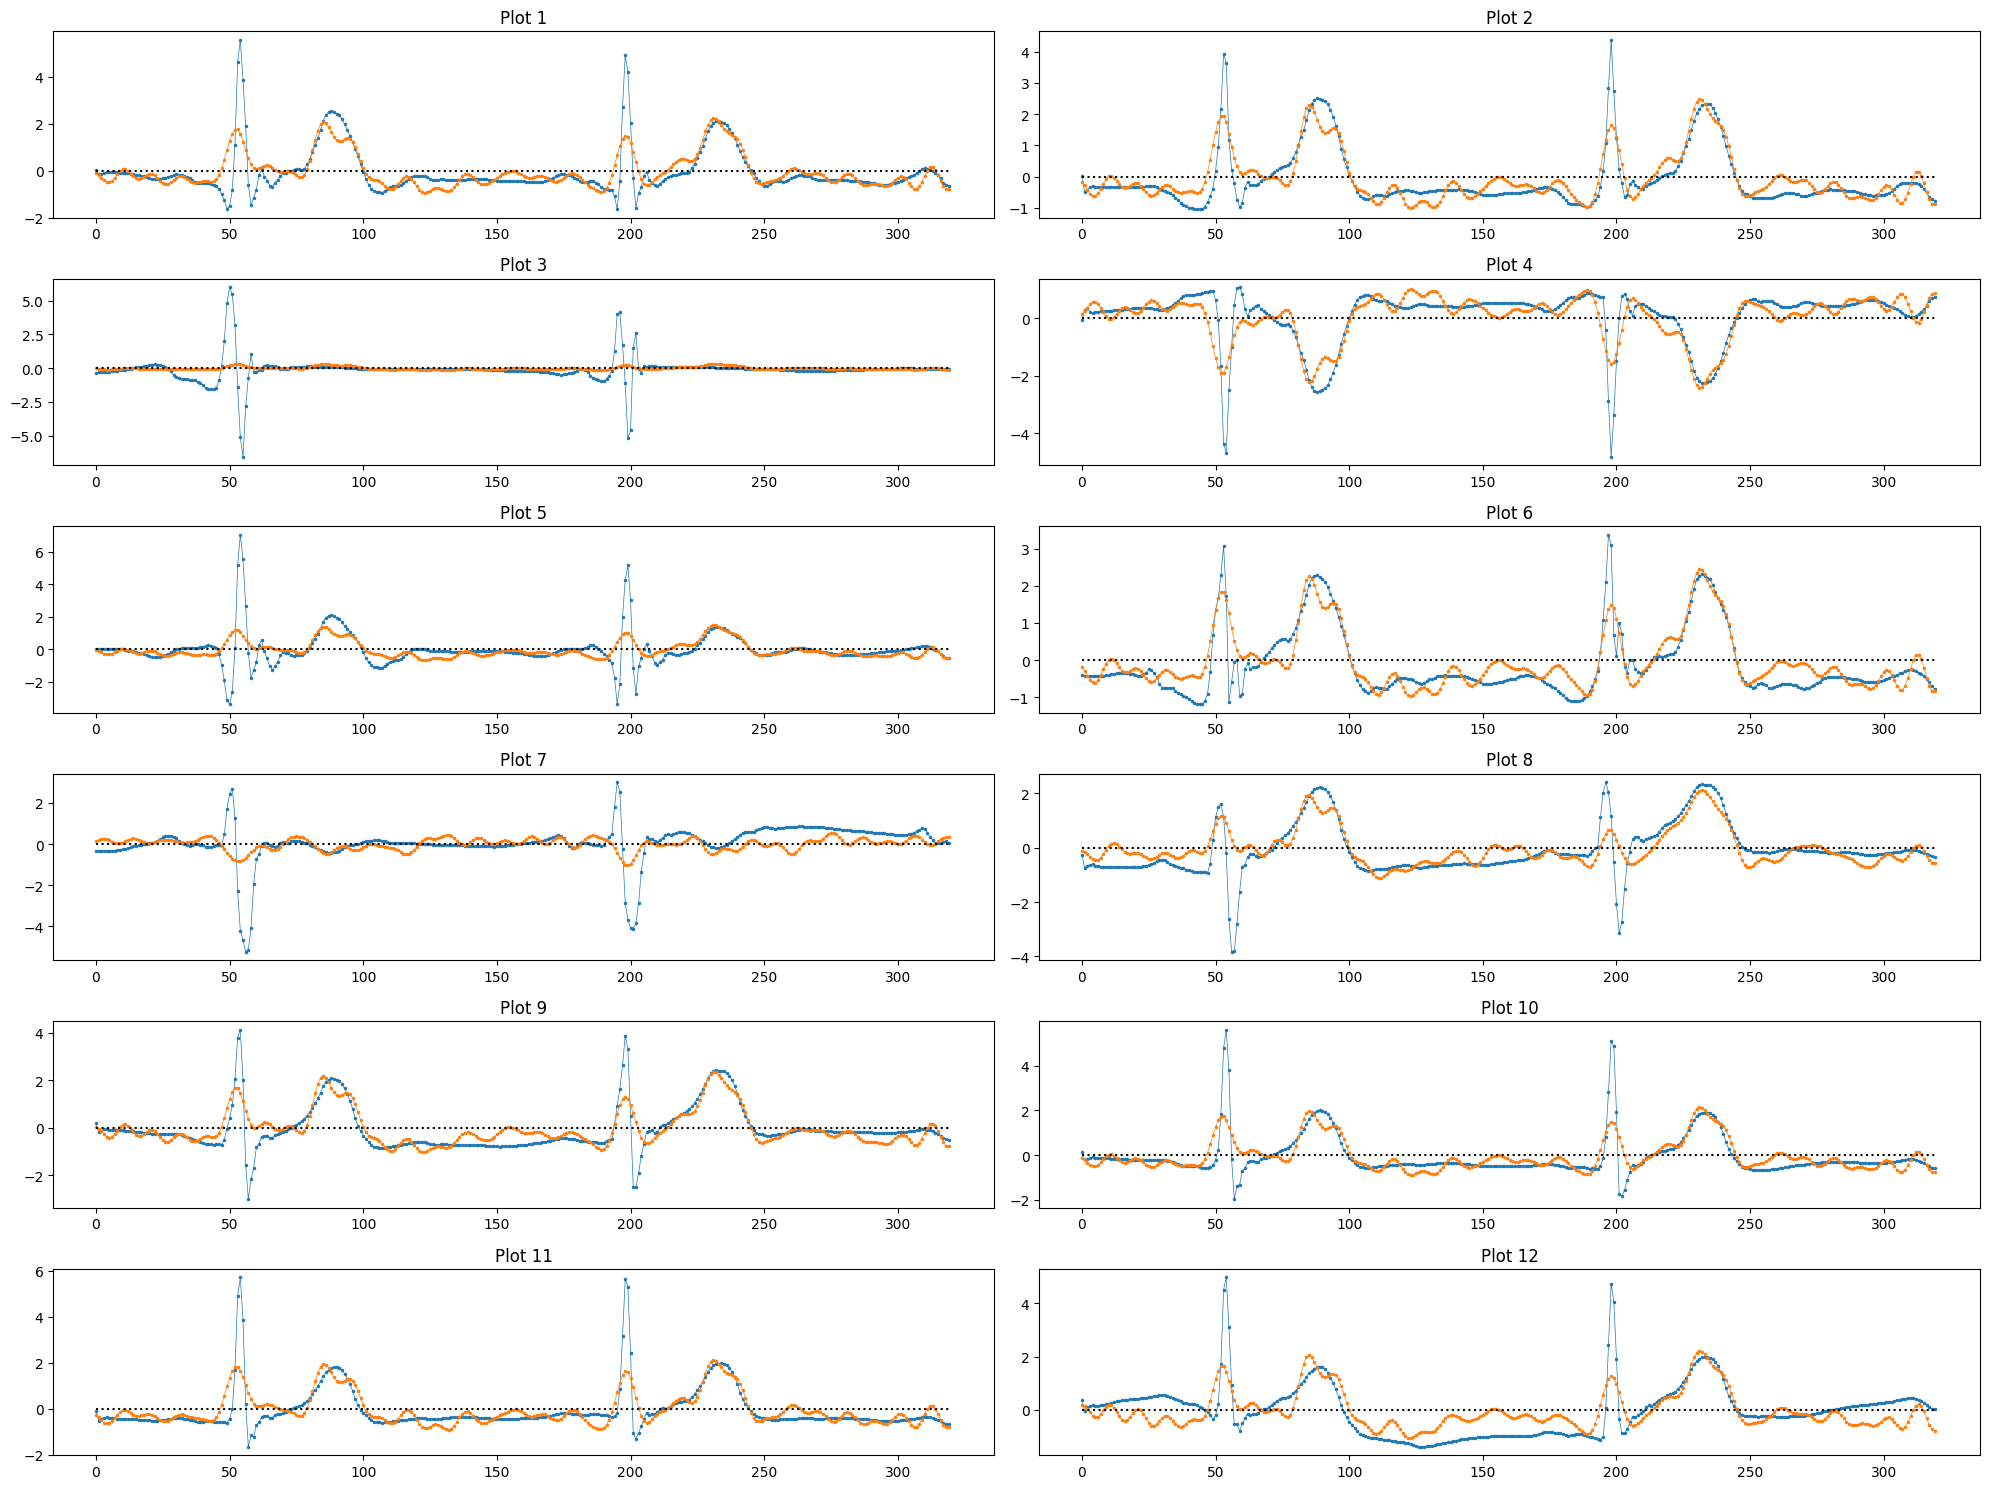

In [16]:
fit_index = int(PERIOD - 0.2 * PERIOD)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(Y[i][:fit_index], '.-', linewidth=0.5, markersize=3)
    axes[i].plot(rec[i][:fit_index], '.-', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, fit_index, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

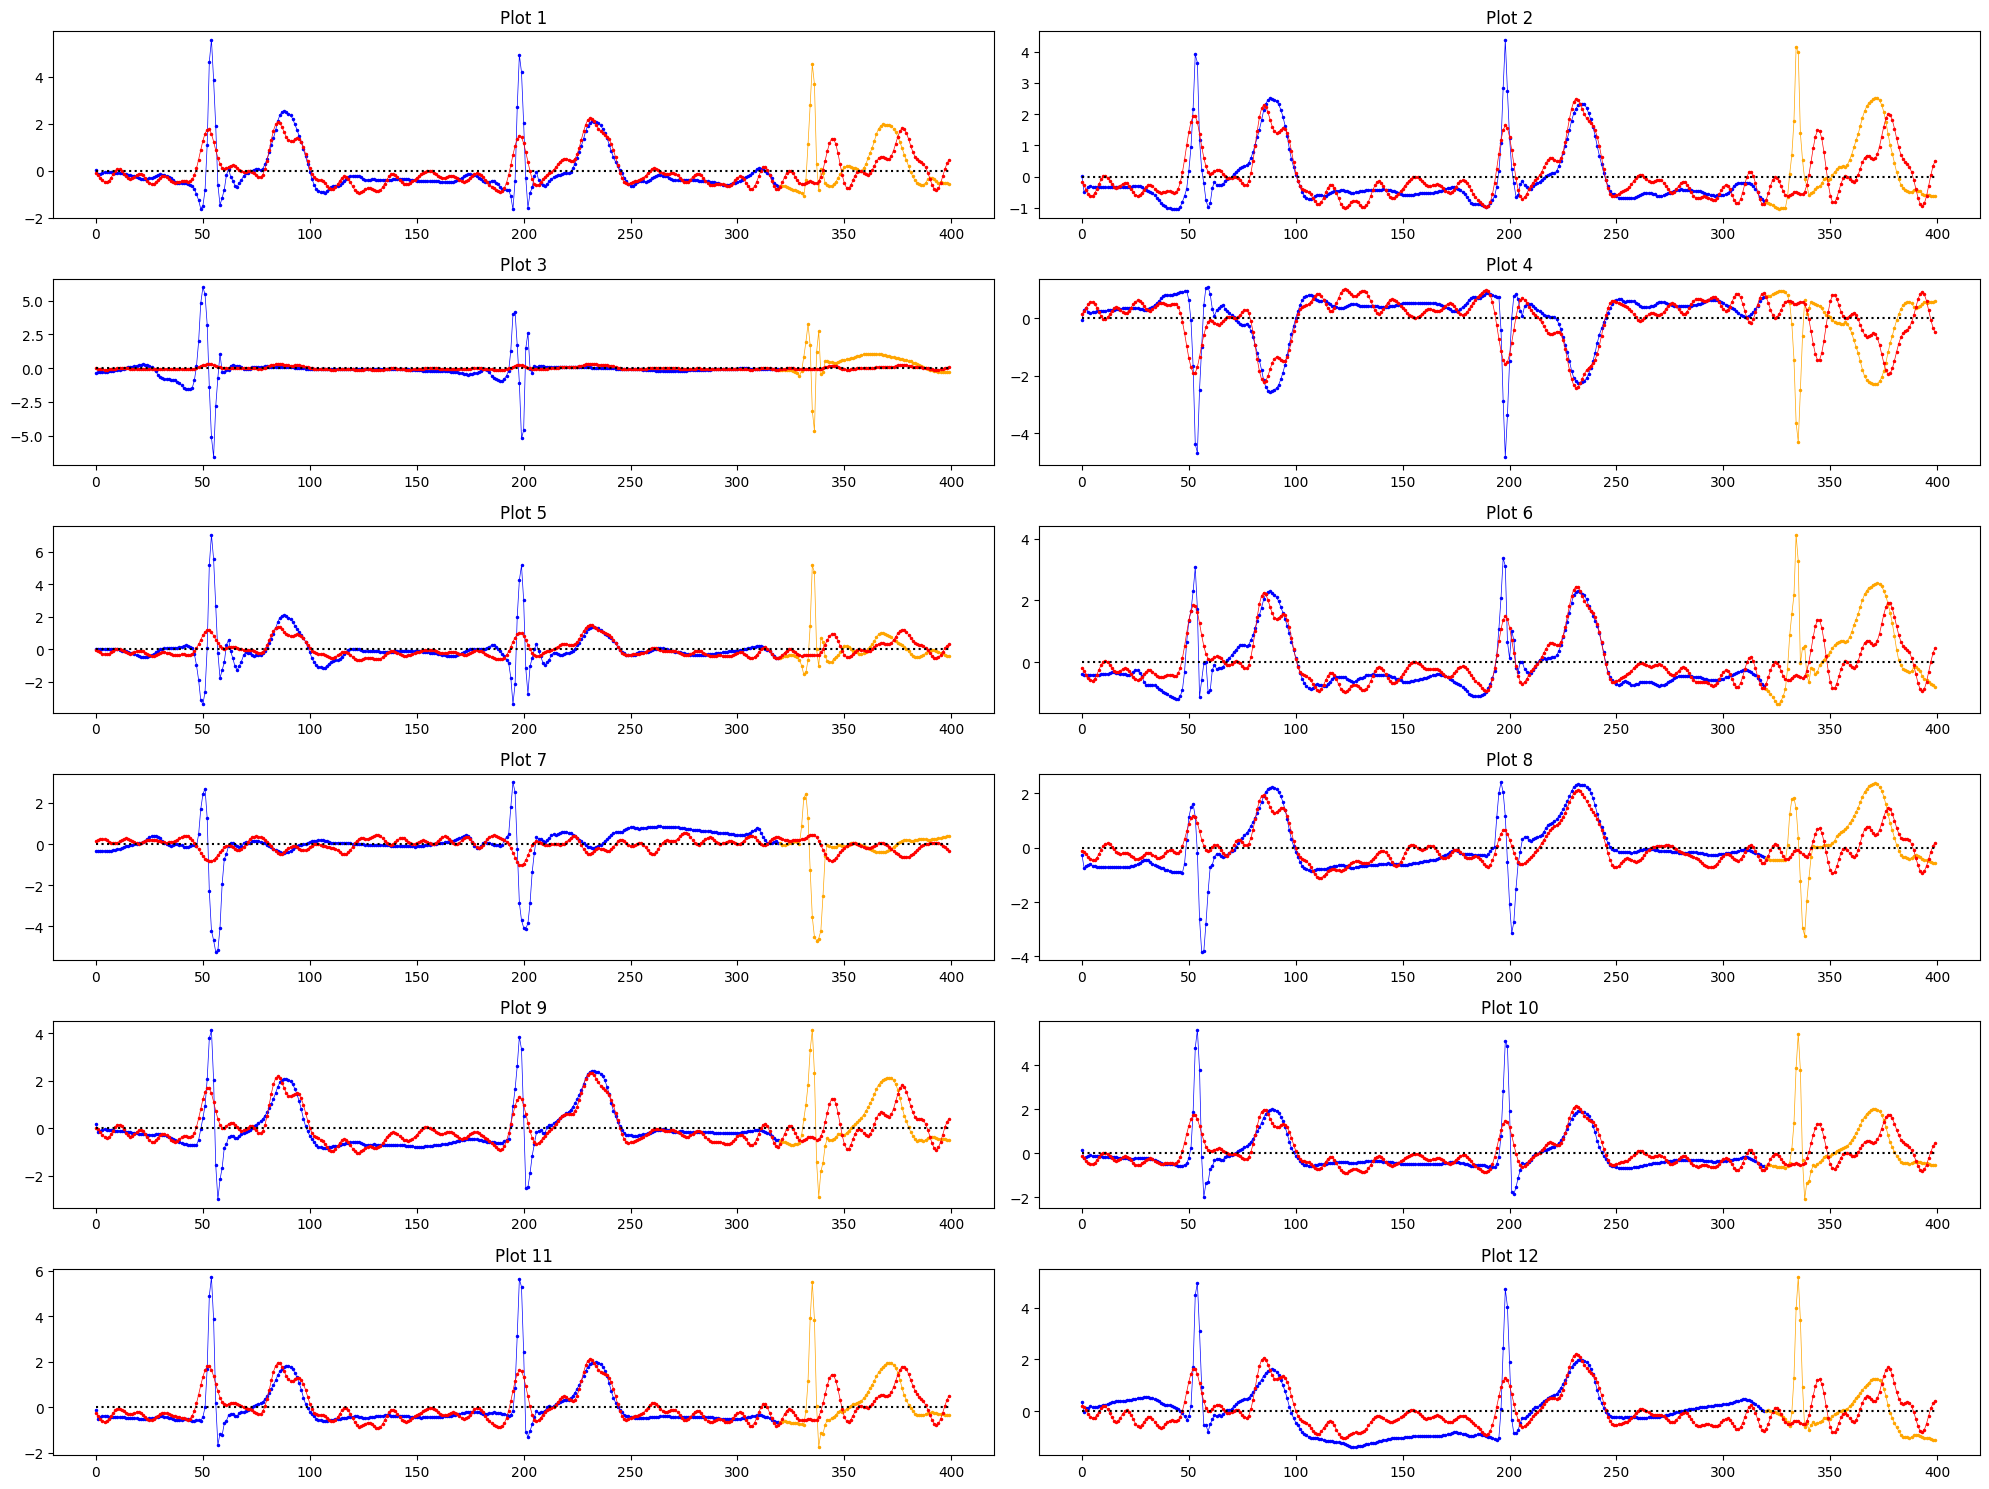

In [17]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(range(fit_index), Y[i][:fit_index], '.-', c='blue', label='Up to fit_index', linewidth=0.5, markersize=3)
    axes[i].plot(range(fit_index, PERIOD), Y[i][fit_index:PERIOD], '.-', c='orange', label='From fit_index', linewidth=0.5, markersize=3)
    axes[i].plot(rec[i], '.-', c="red", label='rec3 up to fit_index', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, PERIOD, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

array([[ 8.88178420e-18],
       [ 1.77635684e-17],
       [ 8.88178420e-18],
       [ 0.00000000e+00],
       [-4.44089210e-18],
       [ 1.77635684e-17],
       [ 0.00000000e+00],
       [-3.55271368e-17],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.77635684e-17],
       [-3.55271368e-17]])

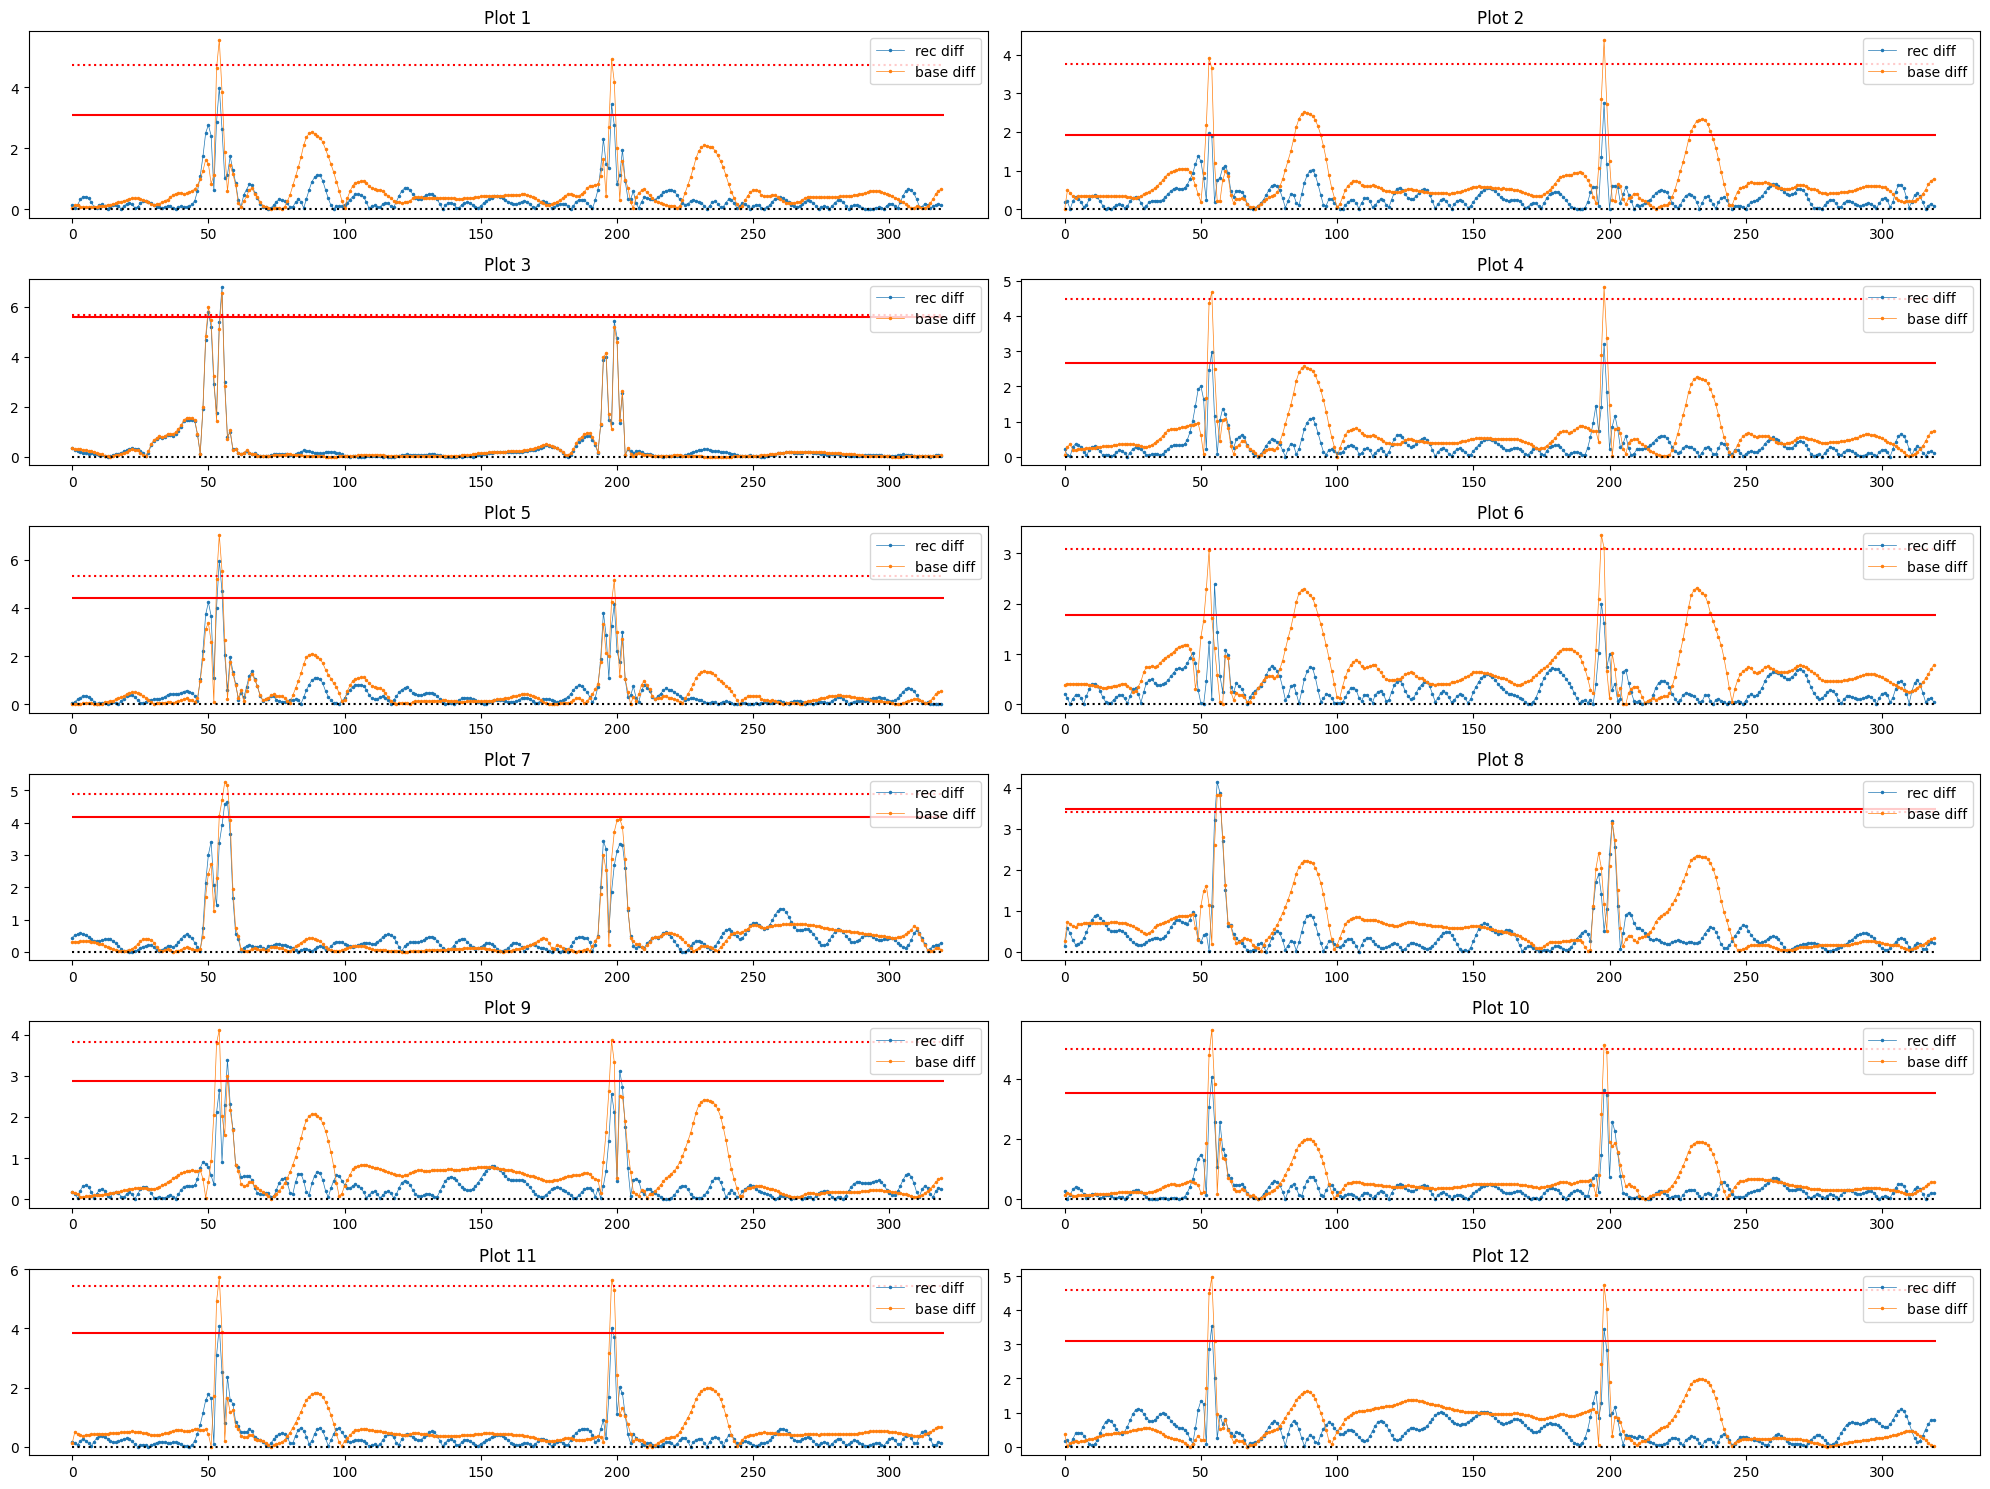

In [41]:
time = np.arange(fit_index)
baseline = baseline.reshape(12,1)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    difference = np.abs(Y[i][:fit_index] - rec[i][:fit_index])
    difference_baseline = np.abs(Y[i][:fit_index] - baseline[i][:fit_index])
    threshold = np.percentile(difference, 99.5)
    threshold_baseline = np.percentile(difference_baseline, 99.5)
    
    axes[i].plot(time, difference, '.-', label='rec diff', linewidth=0.5, markersize=3)
    axes[i].plot(time, difference_baseline, '.-', label='base diff', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, fit_index, linestyles="dotted", colors="black")
    axes[i].hlines(threshold, 0, fit_index, linestyles="-", colors="red")
    axes[i].hlines(threshold_baseline, 0, fit_index, linestyles="dotted", colors="red")
    axes[i].set_title(f"Plot {i+1}")
    axes[i].legend(loc="upper right")
plt.tight_layout()
plt.show()

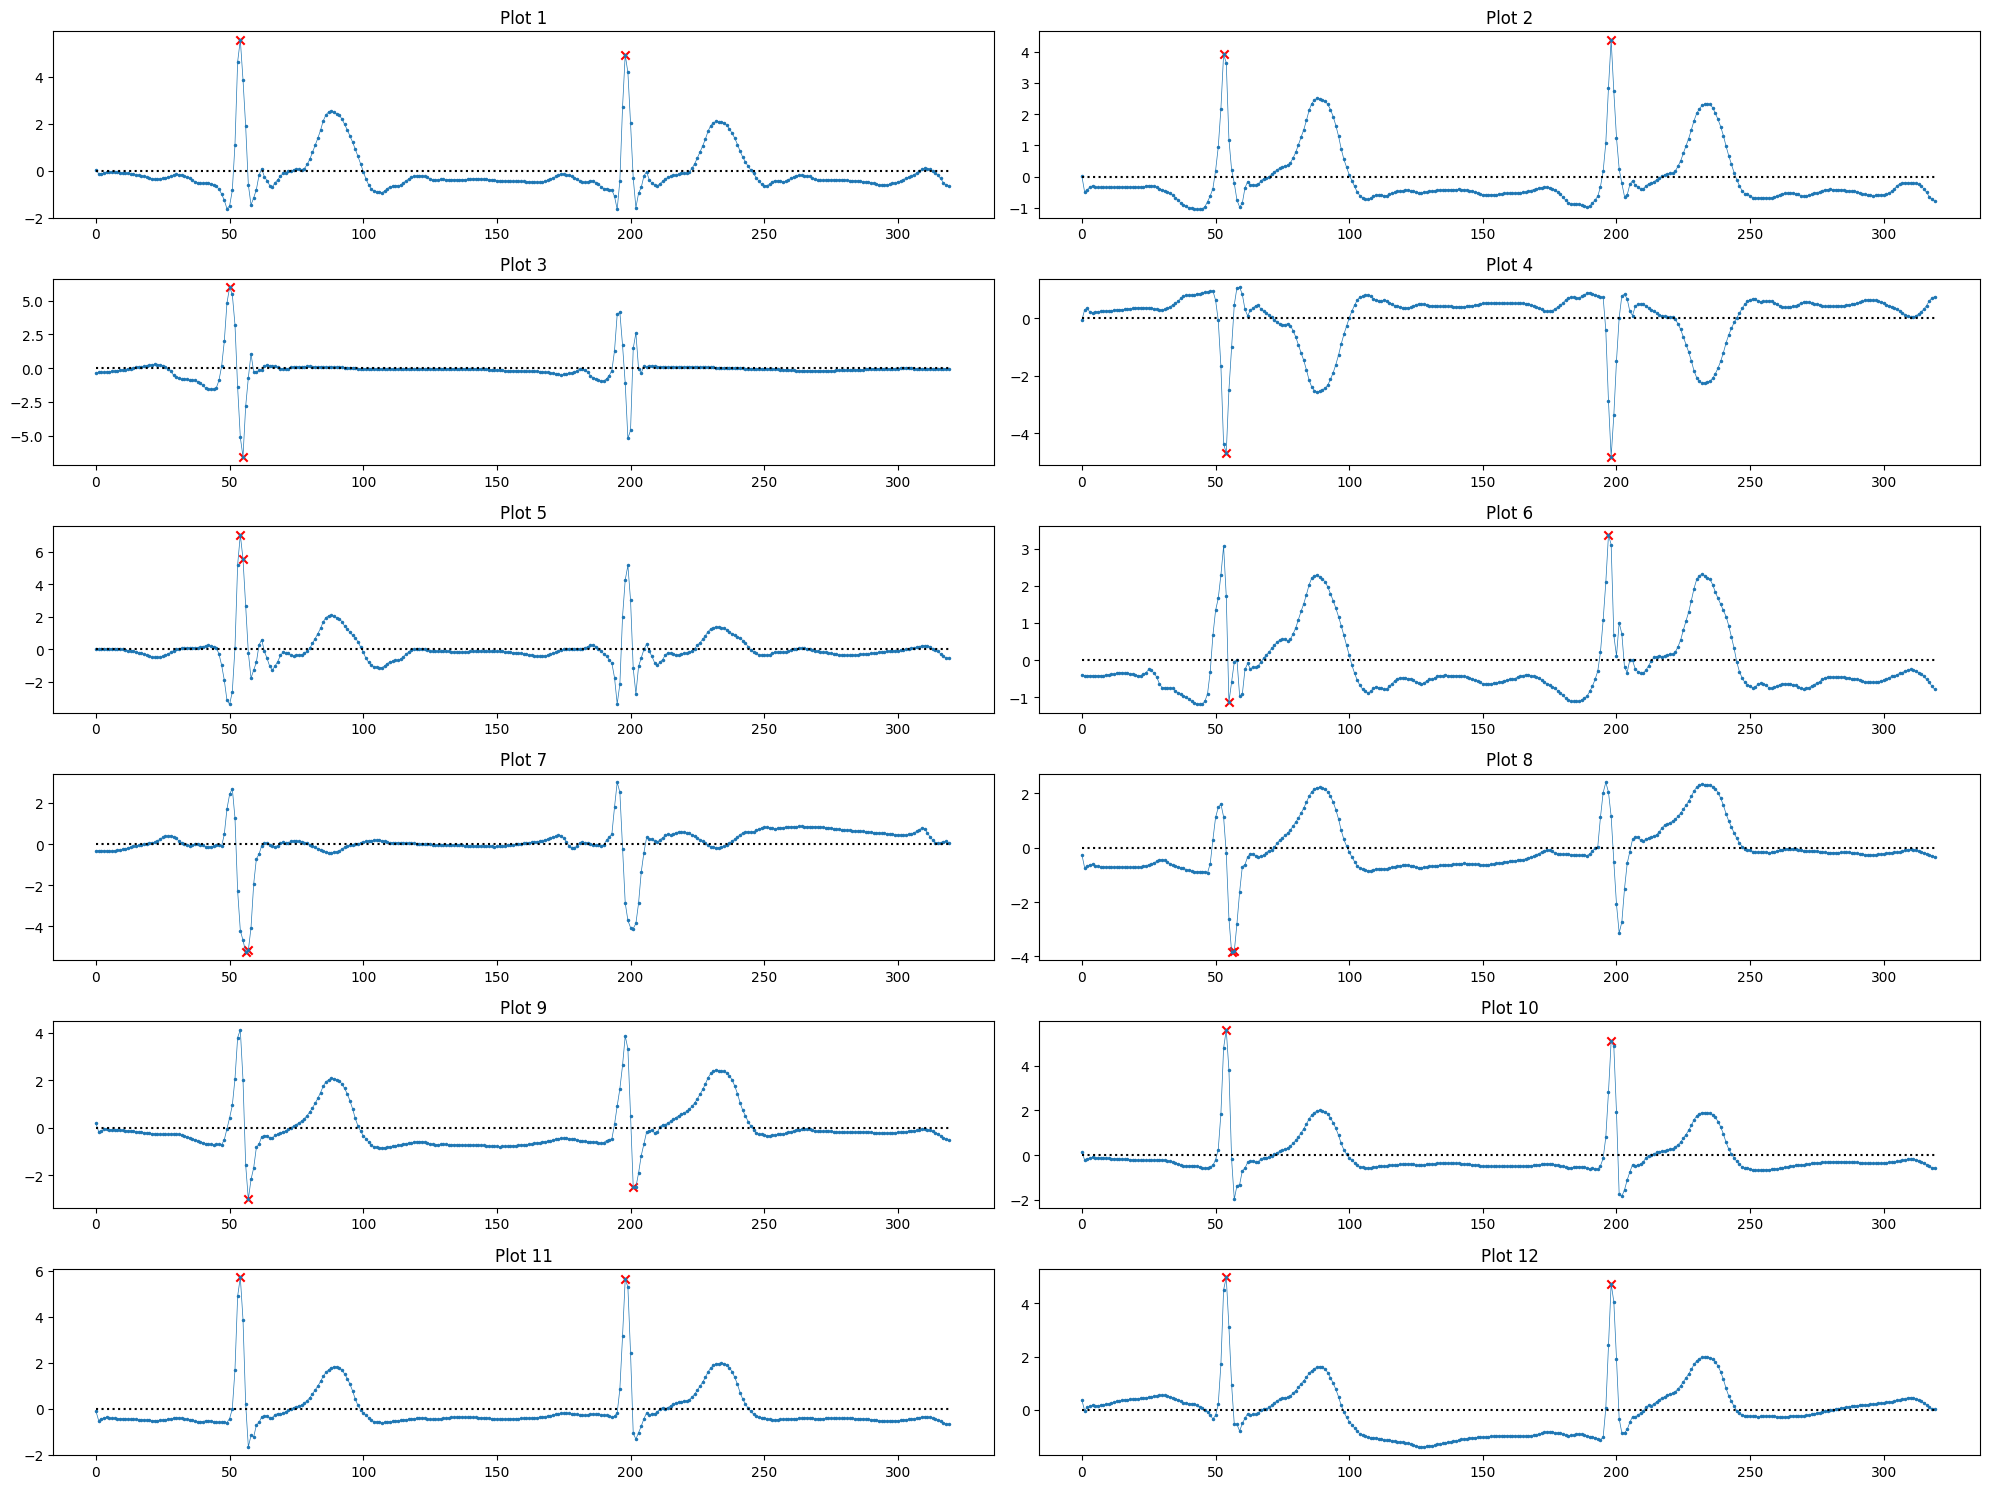

In [19]:
time = np.arange(fit_index)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    difference = np.abs(Y[i][:fit_index] - rec[i][:fit_index])
    difference_baseline = np.abs(Y[i][:fit_index] - baseline[i][:fit_index])
    threshold = np.percentile(difference, 99.5)
    
    isolated_peaks = np.where(difference > threshold, Y[i][:fit_index], 0)
    non_zero_indices = isolated_peaks != 0
    non_zero_times = time[non_zero_indices]
    non_zero_peaks = isolated_peaks[non_zero_indices]
    
    axes[i].plot(time, Y[i][:fit_index], '.-', label='Original Signal', linewidth=0.5, markersize=3)
    axes[i].scatter(non_zero_times, non_zero_peaks, label='Isolated Peaks', marker='x', c="r")
    axes[i].hlines(baseline[i], 0, fit_index, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()